# Dimensionality Reduction Exercises

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

In [ ]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

* Import the data and check the data types.
* Drop the channel and region columns as they won't be used.
* Convert the remaining columns to floats if necessary.
* Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.

In [1]:
# import the libraries
import pandas as pd
import numpy as np

# filepath = os.sep.join(data_path + ['Wholesale_Customers_Data.csv'])
# data = pd.read_csv(filepath, sep=',')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/SCHOOL/Y2SEM3/Machine Learning/Practical/Wholesale customers data.csv")


In [4]:
data.shape

(440, 8)

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Drop the unwanted columns

In [6]:
data = data.drop(['Channel', 'Region'], axis=1)

In [7]:
# data types

data.dtypes

,0
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


In [8]:
# Convert to floats ==== use .astype
for col in data.columns:
  data[col] = data[col].astype(float)

Preserve the original data.

In [9]:
data_orig = data.copy()

## Question 2

As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed.

* Examine the correlation and skew.
* Perform any transformations and scale data using your favorite scaling method.
* View the pairwise correlation plots of the new data.

In [11]:
corr_mat = data.corr()

In [12]:
# check the correlation and skew
# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


As before, the two categories with their respective most strongly correlated variable.

In [13]:
corr_mat.abs().idxmax()

,0
Fresh,Frozen
Milk,Grocery
Grocery,Detergents_Paper
Frozen,Delicassen
Detergents_Paper,Grocery
Delicassen,Milk


Examine the skew values and log transform. Looks like all of them need it.

In [14]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

,0
Delicassen,11.151586
Frozen,5.907986
Milk,4.053755
Detergents_Paper,3.631851
Grocery,3.587429
Fresh,2.561323


In [15]:
# The log transformations

for col in log_columns.index:
    data[col] = np.log1p(data[col])


Scale the data again. Let's use `MinMaxScaler` this time just to mix things up.

In [16]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
  data[col] = mms.fit_transform(data[[col]]).squeeze()


Visualize the relationship between the variables.

In [17]:
import seaborn as sns #
import matplotlib.pyplot as plt

%matplotlib inline

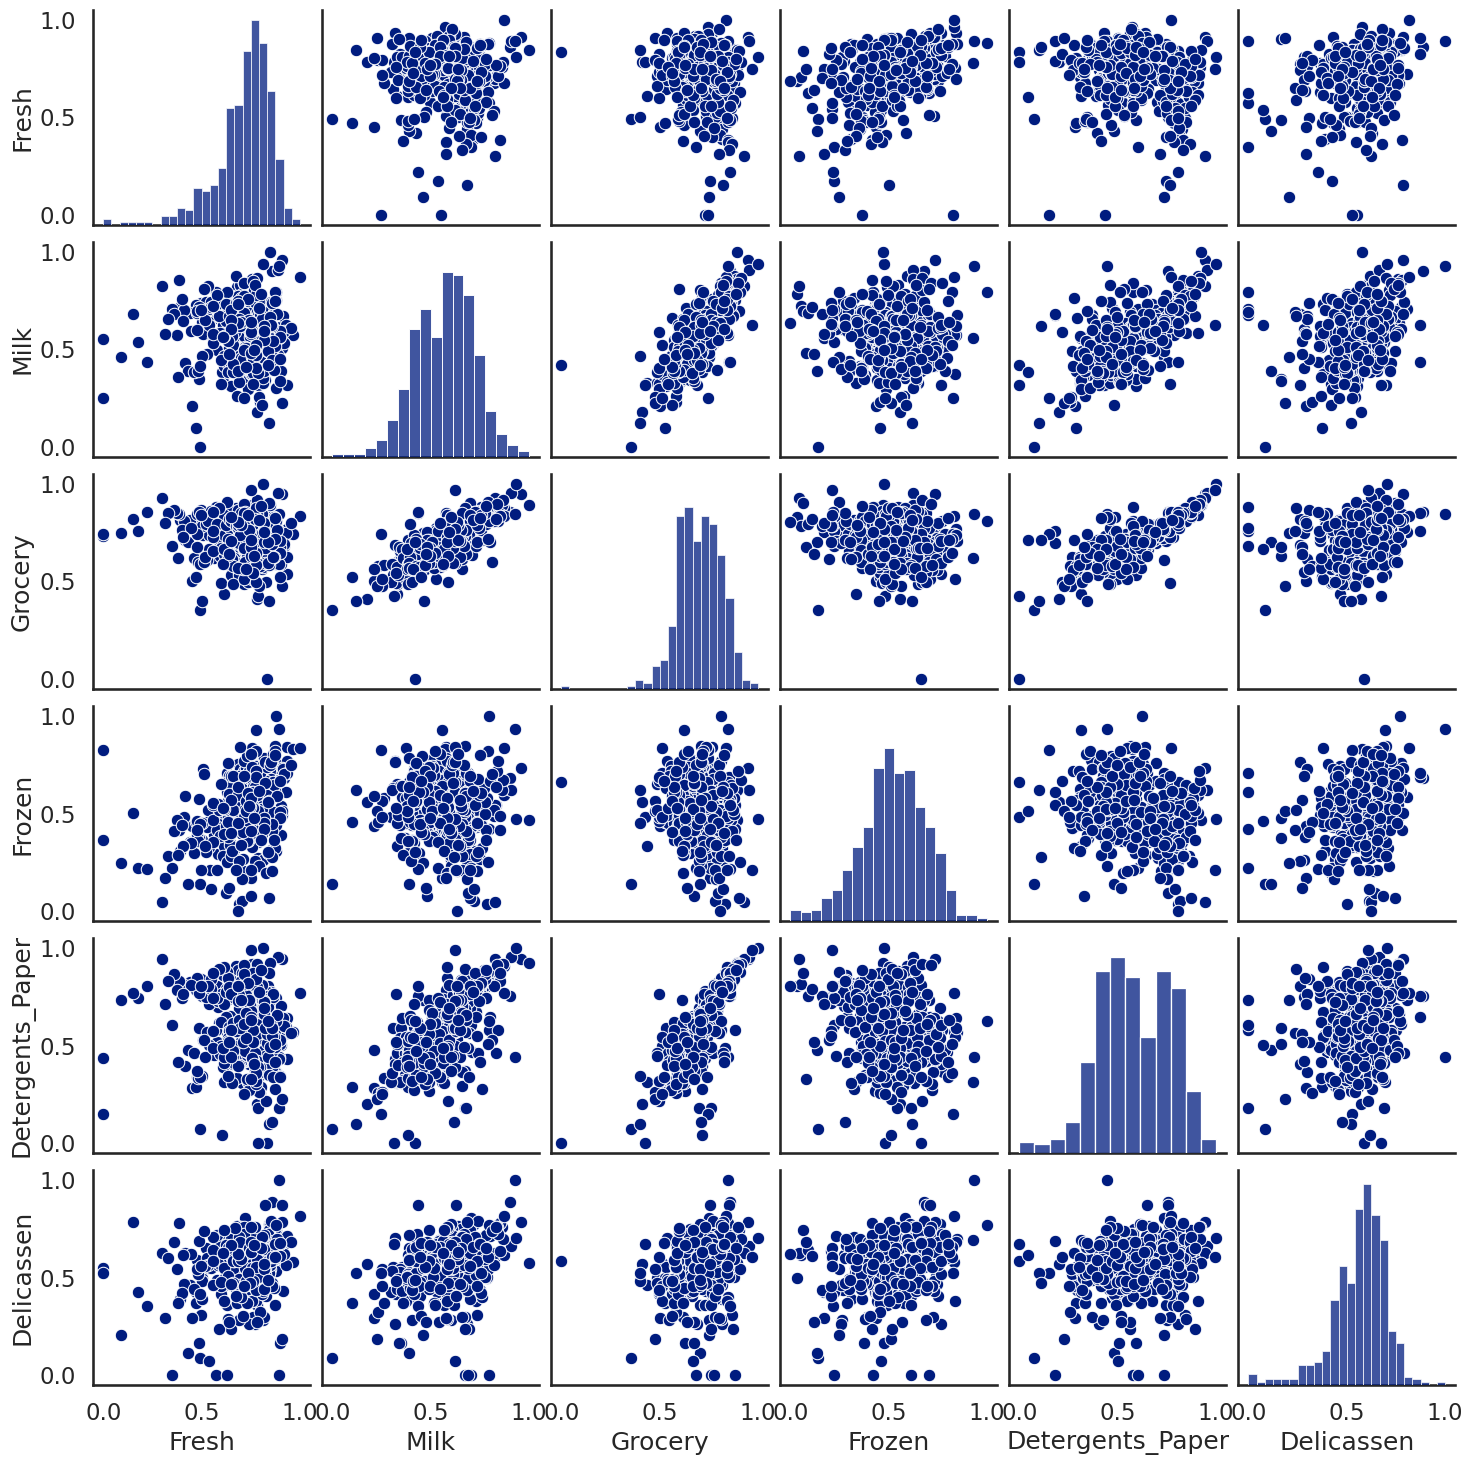

In [28]:
sns.set_context('talk') #google search --> sns.set_context_method
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data);

## Question 3

* Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [`FunctionTransformer`](http://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers).
* Use the pipeline to transform the original data that was stored at the end of question 1.
* Compare the results to the original data to verify that everything worked.

*Hint:* Scikit-learn has a more flexible `Pipeline` function and a shortcut version called `make_pipeline`. Either can be used. Also, if different transformations need to be performed on the data, a [`FeatureUnion`](http://scikit-learn.org/stable/modules/pipeline.html#featureunion-composite-feature-spaces) can be used.

In [ ]:
# import the libraries
__________

# The custom NumPy log transformer
log_transformer = _______

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = _______

# Convert the original data
data_pipe = _______

The results are identical. Note that machine learning models and grid searches can also be added to the pipeline (and in fact, usually are.)

In [ ]:
np.allclose(data_pipe, data)

True

## Question 4

* Perform PCA with `n_components` ranging from 1 to 5.
* Store the amount of explained variance for each number of dimensions.
* Also store the feature importance for each number of dimensions. *Hint:* PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.
* Plot the explained variance and feature importances.

In [ ]:
# import the library
_____

pca_list = _______
______ = list()

# Fit a range of PCA models

for n in range(_______):

    # Create and fit the model
    PCAmod = ________
    PCAmod.fit(data)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

Create a table of feature importances for each data column.

In [ ]:
features_df = (pd.concat(feature_weight_list)
               .pivot(______))

features_df

Create a plot of explained variances.

In [ ]:
sns.set_context(_____)

ax = pca_df[________].plot(kind=______)

ax.set(_______='Number of dimensions',
       ______='Percent explained variance',
       ______='Explained Variance vs Dimensions');

And here's a plot of feature importances.

In [ ]:
ax = ______

ax.set(xlabel=_____,
       ylabel=_______,
       title=_____);

Write 5 observations on the feature importance vs dimensions.

1)

2)

3)

4)

5)

## Question 5

* Fit a `KernelPCA` model with `kernel='rbf'`. You can choose how many components and what values to use for the other parameters.
* If you want to tinker some more, use `GridSearchCV` to tune the parameters of the `KernelPCA` model.

The second step is tricky since grid searches are generally used for supervised machine learning methods and rely on scoring metrics, such as accuracy, to determine the best model. However, a custom scoring function can be written for `GridSearchCV`, where larger is better for the outcome of the scoring function.

What would such a metric involve for PCA? What about percent of explained variance? Or perhaps the negative mean squared error on the data once it has been transformed and then inversely transformed?



In [ ]:
# import libraries
_________

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X

    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)

    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())

    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(data)

kernelPCA.best_estimator_